In [1]:
import numpy as np
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import mnist

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision

from matplotlib import pyplot as plt

In [2]:
np.random.seed(42)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

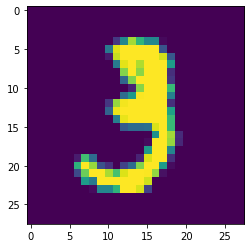

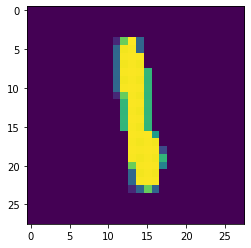

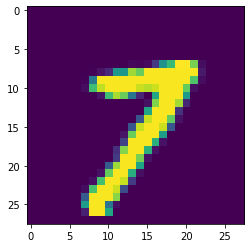

In [4]:
for i in [10, 200, 40000]:
    plt.imshow(X_train[i])
    plt.show()

In [5]:
X_train, X_test = X_train.reshape(60000, 784), X_test.reshape(10000, 784)
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train.max(), X_test.max()

(1.0, 1.0)

In [6]:
y_train, y_test = np_utils.to_categorical(y_train, 10), np_utils.to_categorical(y_test, 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [7]:
model = Sequential()
model.add(Dense(800, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

In [10]:
model.fit(
    X_train,
    y_train,
    batch_size=200,
    epochs=5,
    verbose=1,
    validation_data=(X_test, y_test)
)

Epoch 1/5
300/300 [==============================] - 8s 23ms/step - loss: 0.5083 - accuracy: 0.8625 - val_loss: 0.2886 - val_accuracy: 0.9213
Epoch 2/5
300/300 [==============================] - 4s 14ms/step - loss: 0.2705 - accuracy: 0.9239 - val_loss: 0.2344 - val_accuracy: 0.9343
Epoch 3/5
300/300 [==============================] - 4s 14ms/step - loss: 0.2247 - accuracy: 0.9377 - val_loss: 0.2038 - val_accuracy: 0.9422
Epoch 4/5
300/300 [==============================] - 4s 14ms/step - loss: 0.1936 - accuracy: 0.9463 - val_loss: 0.1793 - val_accuracy: 0.9490
Epoch 5/5
300/300 [==============================] - 4s 14ms/step - loss: 0.1707 - accuracy: 0.9530 - val_loss: 0.1614 - val_accuracy: 0.9537


## Check

[[3.8009759e-05 1.8566409e-07 2.4230192e-04 1.2856874e-03 1.0678873e-06
  5.0188581e-05 8.0929636e-09 9.9826008e-01 6.5739919e-06 1.1592017e-04]]
Digit 7


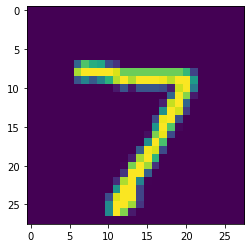

[[1.1196514e-03 1.7710864e-04 9.8103517e-01 1.1101816e-02 2.2095273e-08
  1.4708532e-03 3.4408453e-03 4.3170254e-09 1.6546138e-03 1.9220192e-08]]
Digit 2


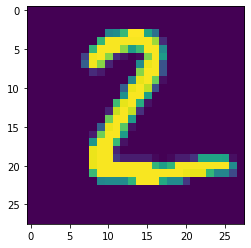

[[2.9665762e-05 9.8032826e-01 7.5719906e-03 1.8125508e-03 6.8288605e-04
  8.3032640e-04 9.7446423e-04 5.4334230e-03 2.0792009e-03 2.5728124e-04]]
Digit 1


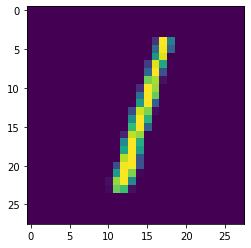

[[9.9960059e-01 4.0424290e-08 1.9786561e-04 1.1441424e-05 5.0565117e-08
  5.0795741e-05 6.7119348e-05 2.2778198e-05 8.3778805e-06 4.0988052e-05]]
Digit 0


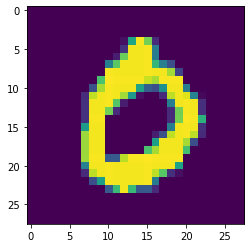

[[2.6107169e-04 6.9268704e-06 1.0807832e-03 4.4837972e-05 9.5151114e-01
  1.6945686e-04 8.0462580e-04 2.8766941e-03 6.3793274e-04 4.2606428e-02]]
Digit 4


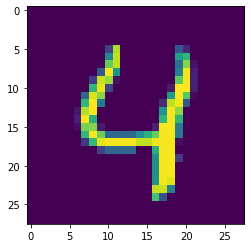

[[4.4152152e-06 9.8895395e-01 1.3552919e-03 9.7324699e-04 1.7381062e-04
  9.0706941e-05 3.6830166e-05 6.6253920e-03 1.3916923e-03 3.9476881e-04]]
Digit 1


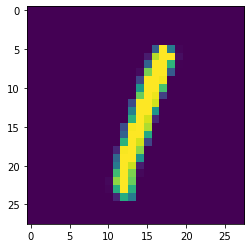

[[8.13750285e-06 1.07724245e-05 1.91877571e-05 2.26820557e-04
  9.70231414e-01 2.20323191e-03 7.60020339e-05 4.59392229e-03
  1.54772839e-02 7.15338578e-03]]
Digit 4


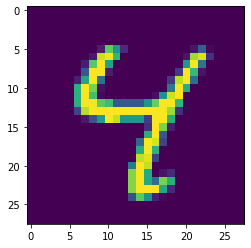

[[3.6566125e-06 1.1633410e-03 2.7128214e-03 3.1484496e-03 7.8059318e-03
  2.5924696e-03 2.0181337e-04 6.3378275e-03 4.3294281e-03 9.7170436e-01]]
Digit 9


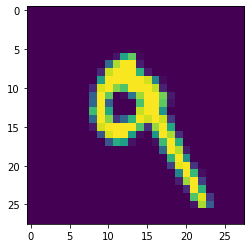

[[3.0027493e-03 1.9855717e-05 9.2454990e-03 1.7548762e-05 1.0077374e-02
  1.7756755e-02 9.5795053e-01 1.6267848e-06 1.7459089e-03 1.8221993e-04]]
Digit 6


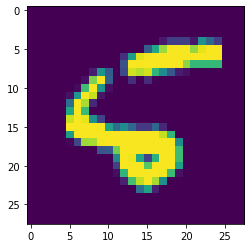

[[2.94514084e-05 1.73450559e-07 1.25232245e-05 3.44455839e-05
  3.19755785e-02 5.40699220e-05 3.66635845e-06 3.09944525e-02
  1.78383628e-03 9.35111880e-01]]
Digit 9


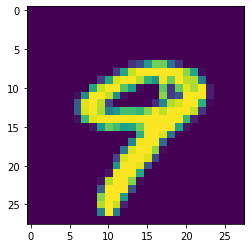

[[9.9612600e-01 9.4062750e-07 1.0354599e-03 7.9814956e-05 6.1708340e-07
  2.5474934e-03 6.7183246e-05 2.3963435e-06 1.2848654e-04 1.1673039e-05]]
Digit 0


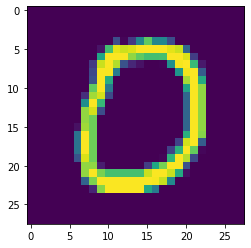

In [11]:
for i in range(11):
    prediction = model.predict(X_test[i:i+1])
    print(prediction)
    print('Digit', prediction.argmax())
    plt.imshow(X_test[i].reshape(28,28))
    plt.show()

In [131]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [132]:
titanic_data = pd.read_csv(r'D:\dataset_titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [133]:
titanic_data = titanic_data[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data_train, data_test = train_test_split(titanic_data, test_size=0.3, random_state=42)

x_train, y_train = data_train[['Pclass', 'Sex', 'Age']], data_train[['Survived']]
x_test, y_test = data_test[['Pclass', 'Sex', 'Age']], data_test[['Survived']]

In [134]:

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [135]:
x_train

array([[1.        , 1.        , 0.25627127],
       [0.5       , 0.        , 0.05458213],
       [1.        , 1.        , 0.35081306],
       ...,
       [0.        , 0.        , 0.50838271],
       [1.        , 1.        , 0.40753813],
       [1.        , 1.        , 0.40753813]])

In [136]:
model_titanic = Sequential()
model_titanic.add(Dense(100, input_dim=3, kernel_initializer='normal', activation='relu'))
#model_titanic.add(Dense(800, kernel_initializer='normal', activation='relu'))
model_titanic.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model_titanic.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [137]:
model_titanic.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    metrics=['accuracy', Precision()]
)

model_titanic.fit(
    x_train,
    y_train,
    #batch_size=100,
    epochs=50,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 0.6843 - accuracy: 0.5972 - precision_34: 0.0000e+00 - val_loss: 0.6751 - val_accuracy: 0.5860 - val_precision_34: 0.0000e+00
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.5972 - precision_34: 0.0000e+00 - val_loss: 0.6592 - val_accuracy: 0.5860 - val_precision_34: 0.0000e+00
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.5972 - precision_34: 0.0000e+00 - val_loss: 0.6473 - val_accuracy: 0.5860 - val_precision_34: 0.0000e+00
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.5972 - precision_34: 0.0000e+00 - val_loss: 0.6356 - val_accuracy: 0.5860 - val_precision_34: 0.0000e+00
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.5972 - precision_34: 0.0000e+00 - val_loss: 0.6223 - val_accuracy: 0.5860 - val_precision_34: 0.0000e+00
Epoch 6/5

In [138]:
predictions = model_titanic.predict(x_test)
predictions[predictions >= 0.5] = 1
predictions[predictions < 1] = 0

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       126
           1       0.75      0.69      0.72        89

    accuracy                           0.78       215
   macro avg       0.77      0.76      0.77       215
weighted avg       0.78      0.78      0.77       215

